# 1.Pandas
### 2.1 Series

In [136]:
import numpy as np
import pandas as pd

In [137]:
np.__version__, pd.__version__

('1.24.3', '1.5.3')

- Series 생성
    - numpy 1차원 배열(value) + index   
     컬럼 단위로 데이터 타입이 같아야 한다.

In [138]:
s = pd.Series([9904312, 3448737, 2890451, 2466052],      # 데이터
                index=['서울', '부산', '인천', '대구']) # int64 자바에서는 long
s

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

In [139]:
type(s)

pandas.core.series.Series

In [140]:
s.index # object는 문자열이다.

Index(['서울', '부산', '인천', '대구'], dtype='object')

In [141]:
# index를 별도로 설정하지 않으면, 인덱스는 0, 1, 2, ... 이 된다.
pd.Series(np.arange(11, 15))

0    11
1    12
2    13
3    14
dtype: int32

In [142]:
s.values

array([9904312, 3448737, 2890451, 2466052], dtype=int64)

In [143]:
s.name = '인구'
s.index.name = '도시'
s

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

- 시리즈 연산 - 벡터화 연산이 가능

In [144]:
s / 1000000

도시
서울    9.904312
부산    3.448737
인천    2.890451
대구    2.466052
Name: 인구, dtype: float64

- 인덱싱

In [145]:
s['서울'], s[0], s.서울

(9904312, 9904312, 9904312)

In [146]:
s['대구'], s[3], s.대구, s[-1]

(2466052, 2466052, 2466052, 2466052)

In [147]:
# 배열 인덱싱 - 결과는 시리즈
s[[0, 1, 3]]

도시
서울    9904312
부산    3448737
대구    2466052
Name: 인구, dtype: int64

In [148]:
s[['서울','인천']]

도시
서울    9904312
인천    2890451
Name: 인구, dtype: int64

In [149]:
# 인덱스로 조건식
s[(s > 2500000) & (s < 5000000)]    # 250만 초과 500만 미만

도시
부산    3448737
인천    2890451
Name: 인구, dtype: int64

In [150]:
s[s % 2 == 0]

도시
서울    9904312
대구    2466052
Name: 인구, dtype: int64

- 슬라이싱

In [151]:
# 숫자 인덱스로 하는 슬라이싱은 넘파이와 동일
s[:2]

도시
서울    9904312
부산    3448737
Name: 인구, dtype: int64

In [152]:
# 인덱스 문자열로 슬라이싱을 하는 경우에는 : 뒤 인덱스를 포함
s[:'인천']

도시
서울    9904312
부산    3448737
인천    2890451
Name: 인구, dtype: int64

- 시리즈와 딕셔너리

In [153]:
# 인덱스가 시리즈에 있는지 여부
'서울' in s, '대전' in s

(True, False)

In [154]:
for key, value in s.items():
    print(f'{key}: {value}')

서울: 9904312
부산: 3448737
인천: 2890451
대구: 2466052


In [155]:
d = {"서울": 9631482, "부산": 3393191, "인천": 2632035, "대전": 1490158}
s2 = pd.Series(d)
s2

서울    9631482
부산    3393191
인천    2632035
대전    1490158
dtype: int64

In [156]:
# 인덱스의 순서를 정하고 싶으면, 인덱스를 별도로 설정해야 함
s2 = pd.Series(d, index=['서울','부산','인천','대전']) 
s2

서울    9631482
부산    3393191
인천    2632035
대전    1490158
dtype: int64

- 인덱스 기반 연산

In [157]:
ds = s - s2
ds

대구         NaN
대전         NaN
부산     55546.0
서울    272830.0
인천    258416.0
dtype: float64

In [158]:
ds.notna()  # ds.notnull()과 동일

대구    False
대전    False
부산     True
서울     True
인천     True
dtype: bool

In [159]:
ds[ds.notna()]

부산     55546.0
서울    272830.0
인천    258416.0
dtype: float64

In [160]:
# 증가율(% 단위)
rs = (s - s2) / s2 * 100
rs = rs[rs.notna()]
rs

부산    1.636984
서울    2.832690
인천    9.818107
dtype: float64

- 데이터의 갱신,추가,삭제

In [161]:
rs['부산'] = 1.64
rs[1] = 2.83
rs.인천 = 9.82
rs

부산    1.64
서울    2.83
인천    9.82
dtype: float64

In [162]:
rs['광주'] = 1.51   # 추가하는 경우 rs[3], rs.광주 는 사용할 수 없음
rs

부산    1.64
서울    2.83
인천    9.82
광주    1.51
dtype: float64

In [163]:
del rs['부산']      # 삭제하는 경우 rs[0], rs.부산 은 사용할 수 없음
rs

서울    2.83
인천    9.82
광주    1.51
dtype: float64

### 연습문제 4.1.1

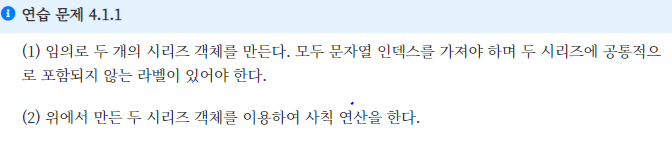

In [164]:
s1 = pd.Series(np.arange(11,15), index = ['a','b','c','x'])
s2 = pd.Series(np.arange(31,39,2), index = ['a','b','c','y'])
print(s1)
print(s2)

a    11
b    12
c    13
x    14
dtype: int32
a    31
b    33
c    35
y    37
dtype: int32


In [165]:
print(s1 + s2, s1 - s2, s1 * s2, s1 / s2, sep='\n')

a    42.0
b    45.0
c    48.0
x     NaN
y     NaN
dtype: float64
a   -20.0
b   -21.0
c   -22.0
x     NaN
y     NaN
dtype: float64
a    341.0
b    396.0
c    455.0
x      NaN
y      NaN
dtype: float64
a    0.354839
b    0.363636
c    0.371429
x         NaN
y         NaN
dtype: float64


- 중요한 method

In [166]:
dice = pd.Series(np.random.randint(1, 7, 10))
dice

0    2
1    5
2    6
3    2
4    4
5    2
6    4
7    5
8    4
9    5
dtype: int32

In [167]:
# 요소의 갯수
dice.count(), dice.size

(10, 10)

In [168]:
# 고유의 값
dice.unique()

array([2, 5, 6, 4])

In [169]:
# 고유한 값의 갯수
dice.nunique()

4

In [170]:
# 고유한 값 별로 갯수
dice.value_counts()

2    3
5    3
4    3
6    1
dtype: int64

In [171]:
np.unique(dice.values, return_counts=True)

(array([2, 4, 5, 6]), array([3, 3, 3, 1], dtype=int64))

In [172]:
# 기술통계
dice.min(), dice.max(), dice.mean(),dice.median(), dice.var(), dice.std()

(2, 6, 3.9, 4.0, 2.1000000000000005, 1.449137674618944)

In [173]:
# 기술통계 요약
dice.describe()

count    10.000000
mean      3.900000
std       1.449138
min       2.000000
25%       2.500000
50%       4.000000
75%       5.000000
max       6.000000
dtype: float64

In [175]:
# 값의 오름차순 정렬
dice.sort_values()

0    2
3    2
5    2
4    4
6    4
8    4
1    5
7    5
9    5
2    6
dtype: int32

In [176]:
# 값의 내림차순 정렬
dice.sort_values(ascending=False)

2    6
1    5
7    5
9    5
4    4
6    4
8    4
0    2
3    2
5    2
dtype: int32

In [177]:
# 인덱스의 오름차순 정렬
s.sort_index()

도시
대구    2466052
부산    3448737
서울    9904312
인천    2890451
Name: 인구, dtype: int64

In [178]:
# 인덱스의 내림차순 정렬
s.sort_index(ascending=False)

도시
인천    2890451
서울    9904312
부산    3448737
대구    2466052
Name: 인구, dtype: int64

In [179]:
# inplace=True 면 자기자신이 변화함(자기파괴적 메소드)
s.sort_index(inplace=True)
s

도시
대구    2466052
부산    3448737
서울    9904312
인천    2890451
Name: 인구, dtype: int64

- 결측치(Na, NaN, null) 처리

In [180]:
ds

대구         NaN
대전         NaN
부산     55546.0
서울    272830.0
인천    258416.0
dtype: float64

In [181]:
# 결측치 확인
ds.isna()   # ds.isnull()과 동일

대구     True
대전     True
부산    False
서울    False
인천    False
dtype: bool

In [184]:
# 시리즈 내에 결측치가 있는지 확인
ds.isna().sum(), s.isna().sum()
# 결측치가 있으면 1이고 결측치가 없으면 0

(2, 0)

- Titanic data로 확인

In [206]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()          # 앞의 다섯줄 보여주기

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [207]:
survived = titanic['survived']
age = titanic['age']

In [189]:
survived.isna().sum()       # 결과가 0이므로 결측치가 없음

0

In [190]:
age.isna().sum()            # 결과가 0이 아니므로 결측치가 있음

177

- 결측치 처리
    - 제거
    - 대푯값(중앙값, 평균, 최빈값)으로 대체
    - 임의의 값으로 대체

In [192]:
# 제거
ds.dropna(inplace=True)
ds

부산     55546.0
서울    272830.0
인천    258416.0
dtype: float64

In [209]:
# 평균으로 대체하고 데이터 타입을 정수형으로 변경
age = age.fillna(age.mean()).astype(int)
age.head()

0    22
1    38
2    26
3    35
4    35
Name: age, dtype: int32

In [210]:
embark = titanic.embark_town
embark.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [211]:
embark.isna().sum()

2

In [212]:
embark.fillna('Southampton', inplace=True)
embark.value_counts()

Southampton    646
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [214]:
# data frame은 시리즈의 조합이다.
# df['c1'][1]